## 前期数据分析

### 读取数据

In [1]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# 读取数据
train = pd.read_csv('./dataset/train.csv')
test = pd.read_csv('./dataset/test_withoutLable.csv')

# 输出训练集和测试集的大小
print("train.shape:", train.shape, "test.shape:", test.shape)

train.shape: (50000, 23) test.shape: (20692, 22)


In [3]:
print("训练集的摘要信息")
train.info()
print("数据集的摘要信息")
test.info()

训练集的摘要信息
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   ID                    50000 non-null  int64
 1   Diabetes_binary       50000 non-null  int64
 2   HighBP                50000 non-null  int64
 3   HighChol              50000 non-null  int64
 4   CholCheck             50000 non-null  int64
 5   BMI                   50000 non-null  int64
 6   Smoker                50000 non-null  int64
 7   Stroke                50000 non-null  int64
 8   HeartDiseaseorAttack  50000 non-null  int64
 9   PhysActivity          50000 non-null  int64
 10  Fruits                50000 non-null  int64
 11  Veggies               50000 non-null  int64
 12  HvyAlcoholConsump     50000 non-null  int64
 13  AnyHealthcare         50000 non-null  int64
 14  NoDocbcCost           50000 non-null  int64
 15  GenHlth               50000 non-null  int64


- 可以看出训练集和测试集中不存在丢失数据的情况，因此不需要进行数据填充
- 数据的类型全是 int64 类型

## 特征分析

分析样本的糖尿病情况，因此主要分析特征 `Diabetes_binary` 和其他特征的关系。

### Diabetes_binary 分析

<Axes: ylabel='count'>

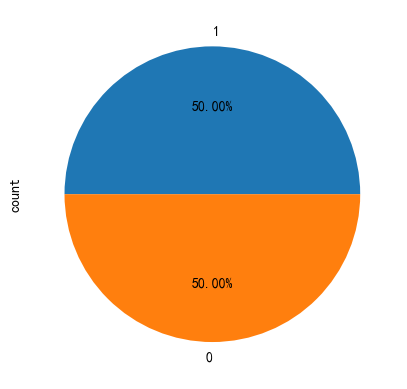

In [ ]:
train['Diabetes_binary'].value_counts().plot.pie(autopct='%1.2f%%')

整个训练集中有糖尿病样本数量为 25000，非糖尿病样本数量为 25000，两者数量相等。

### HighBP 对 Diabetes_binary 的分析

        count      mean
HighBP                 
0       21835  0.283719
1       28165  0.667673


Text(0.5, 1.0, 'HighBP & Diabetes_binary')

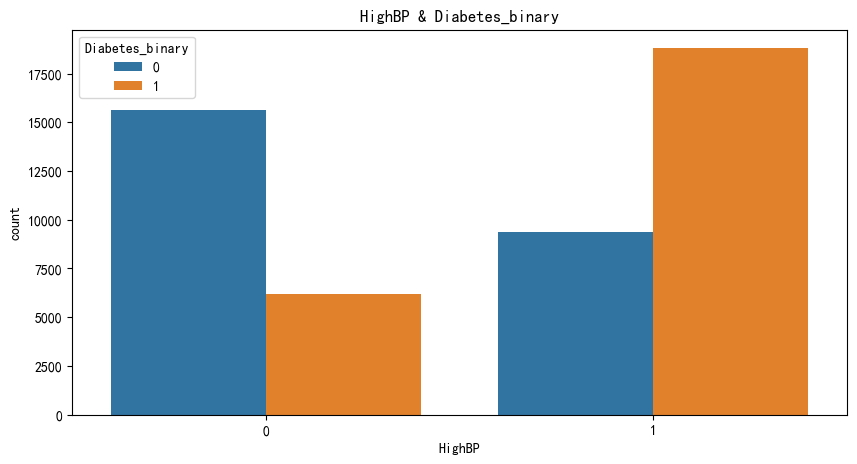

In [ ]:
print(train.groupby(['HighBP'])['Diabetes_binary'].agg(['count', 'mean']))
plt.figure(figsize=(10, 5))
sns.countplot(x='HighBP', hue='Diabetes_binary', data=train)
plt.title('HighBP & Diabetes_binary')

数据表明 HighBP 为 1 的样本数量为 28165，其中有糖尿病的样本数量占比 66.76%，HighBP 为 0 的样本数量 21835，其中有糖尿病的样本数量占比 28.37%。

即：**HighBP 对糖尿病有关**

### HighChol 对 Diabetes_binary 的分析

          count      mean
HighChol                 
0         23697  0.347597
1         26303  0.637304


Text(0.5, 1.0, 'HighChol & Diabetes_binary')

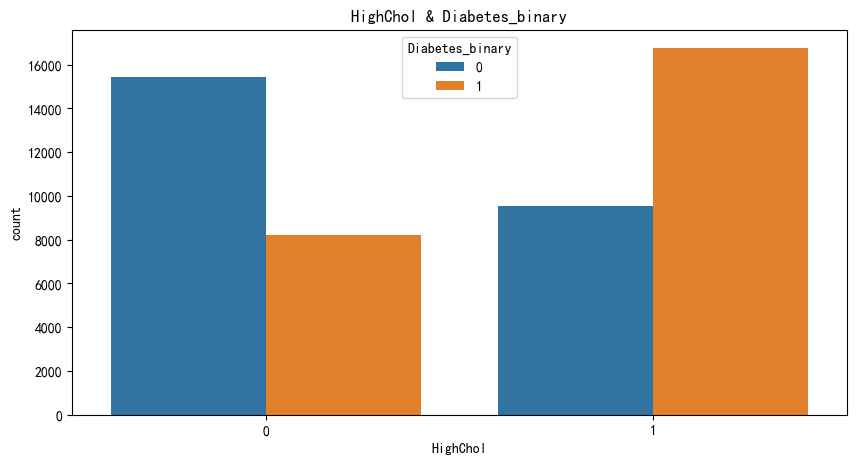

In [ ]:
print(train.groupby(['HighChol'])['Diabetes_binary'].agg(['count', 'mean']))
plt.figure(figsize=(10, 5))
sns.countplot(x='HighChol', hue='Diabetes_binary', data=train)
plt.title('HighChol & Diabetes_binary')

数据表明 HighChol 为 1 的样本数量为 26303，其中有糖尿病的样本数量占比 63.73%，HighChol 为 0 的样本数量 21835，其中有糖尿病的样本数量占比 28.37%。

即：**HighChol 对糖尿病有关**

### CholCheck 对 Diabetes_binary 的分析

           count      mean
CholCheck                 
0           1227  0.146699
1          48773  0.508888


Text(0.5, 1.0, 'CholCheck & Diabetes_binary')

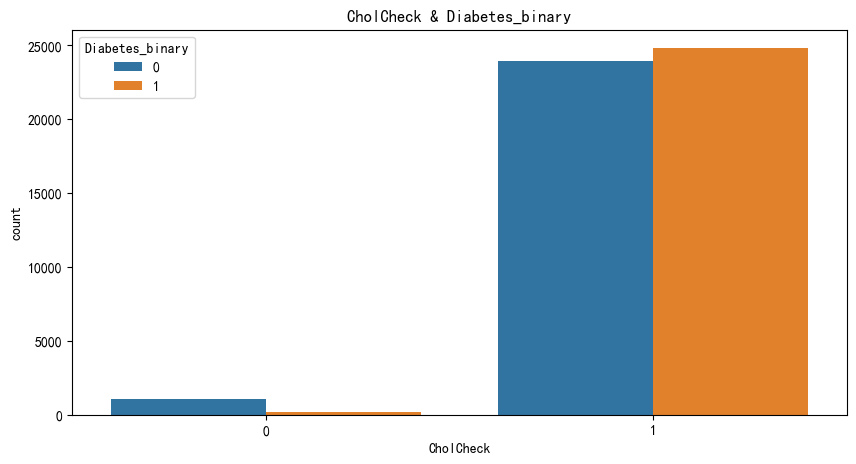

In [ ]:
print(train.groupby(['CholCheck'])['Diabetes_binary'].agg(['count', 'mean']))
plt.figure(figsize=(10, 5))
sns.countplot(x='CholCheck', hue='Diabetes_binary', data=train)
plt.title('CholCheck & Diabetes_binary')

数据表明 CholCheck 为 1 的样本数量为 48773，其中有糖尿病的样本数量占比 50.88%，CholCheck 为 0 的样本数量 1227，其中有糖尿病的样本数量占比 14.66%。

即：**CholCheck 对糖尿病基本无关**

### BMI 对 Diabetes_binary 的分析

     count      mean
BMI                 
12       1  0.000000
13       7  0.285714
14       7  0.428571
15      23  0.434783
16      55  0.309091
..     ...       ...
87       8  0.750000
89       2  1.000000
92       5  0.800000
95       3  0.333333
98       3  1.000000

[79 rows x 2 columns]


Text(0.5, 1.0, 'BMI & Diabetes_binary')

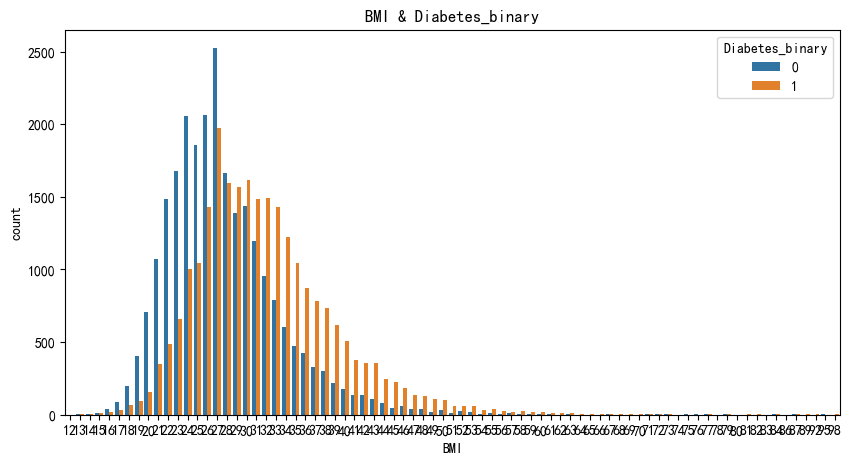

In [ ]:
print(train.groupby(['BMI'])['Diabetes_binary'].agg(['count', 'mean']))
plt.figure(figsize=(10, 5))
sns.countplot(x='BMI', hue='Diabetes_binary', data=train)
plt.title('BMI & Diabetes_binary')

数据表明 BMI 超过 27（包括 27） 中有糖尿病的样本数量比没有糖尿病的样本数量多， BMI 为 27 以下的样本数量中有糖尿病的样本数量比没有糖尿病的样本数量多。

即：**BMI 在27之后对糖尿病有关**

### Smoker 对 Diabetes_binary 的分析

        count      mean
Smoker                 
0       26235  0.460072
1       23765  0.544077


Text(0.5, 1.0, 'Smoker & Diabetes_binary')

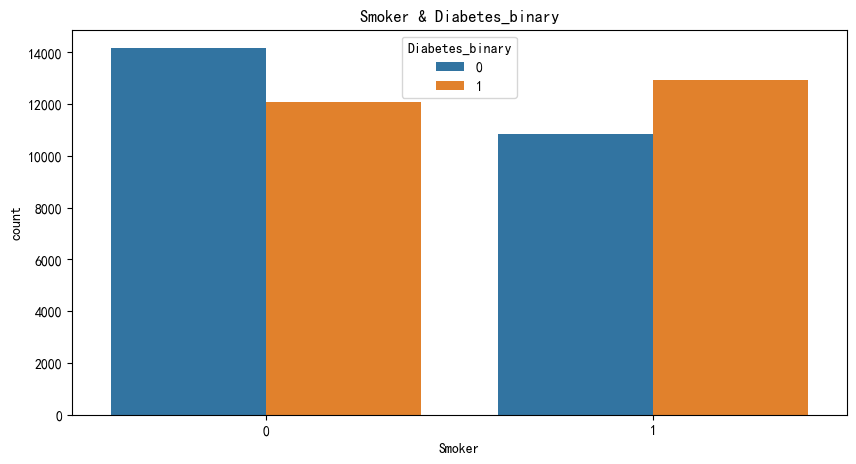

In [ ]:
print(train.groupby(['Smoker'])['Diabetes_binary'].agg(['count', 'mean']))
plt.figure(figsize=(10, 5))
sns.countplot(x='Smoker', hue='Diabetes_binary', data=train)
plt.title('Smoker & Diabetes_binary')

数据表明 Smoker 为 1 的样本数量为 23765，其中有糖尿病的样本数量占比 54.40%， Smoker 为 0 的样本数量 26235，其中有糖尿病的样本数量占比 46.00%。

即：**Smoker 对糖尿病有关**

### Stroke 对 Diabetes_binary 的分析

        count      mean
Stroke                 
0       46897  0.483720
1        3103  0.746052


Text(0.5, 1.0, 'Stroke & Diabetes_binary')

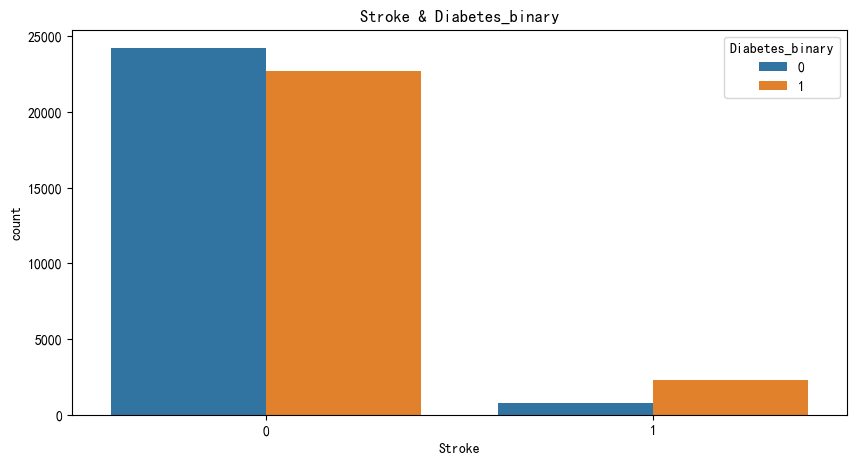

In [ ]:
print(train.groupby(['Stroke'])['Diabetes_binary'].agg(['count', 'mean']))
plt.figure(figsize=(10, 5))
sns.countplot(x='Stroke', hue='Diabetes_binary', data=train)
plt.title('Stroke & Diabetes_binary')

数据表明 Stroke 为 1 的样本数量为 3103，其中有糖尿病的样本数量占比 74.60%， Stroke 为 0 的样本数量 46897，其中有糖尿病的样本数量占比 48.37%。

即：**Stroke 对糖尿病有关**

### HeartDiseaseorAttack 对 Diabetes_binary 的分析

                      count      mean
HeartDiseaseorAttack                 
0                     42584  0.456392
1                      7416  0.750405


Text(0.5, 1.0, 'HeartDiseaseorAttack & Diabetes_binary')

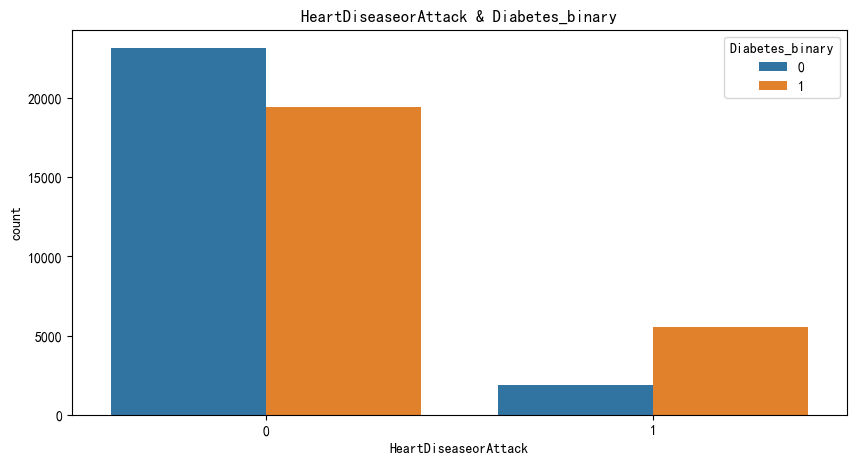

In [ ]:
print(train.groupby(['HeartDiseaseorAttack'])['Diabetes_binary'].agg(['count', 'mean']))
plt.figure(figsize=(10, 5))
sns.countplot(x='HeartDiseaseorAttack', hue='Diabetes_binary', data=train)
plt.title('HeartDiseaseorAttack & Diabetes_binary')

数据表明 HeartDiseaseorAttack 为 1 的样本数量为 7416，其中有糖尿病的样本数量占比 75.04%， HeartDiseaseorAttack 为 0 的样本数量 42584，其中有糖尿病的样本数量占比 45.63%。

即：**HeartDiseaseorAttack 对糖尿病有关**

### PhysActivity 对 Diabetes_binary 的分析

              count      mean
PhysActivity                 
0             14875  0.619765
1             35125  0.449281


Text(0.5, 1.0, 'PhysActivity & Diabetes_binary')

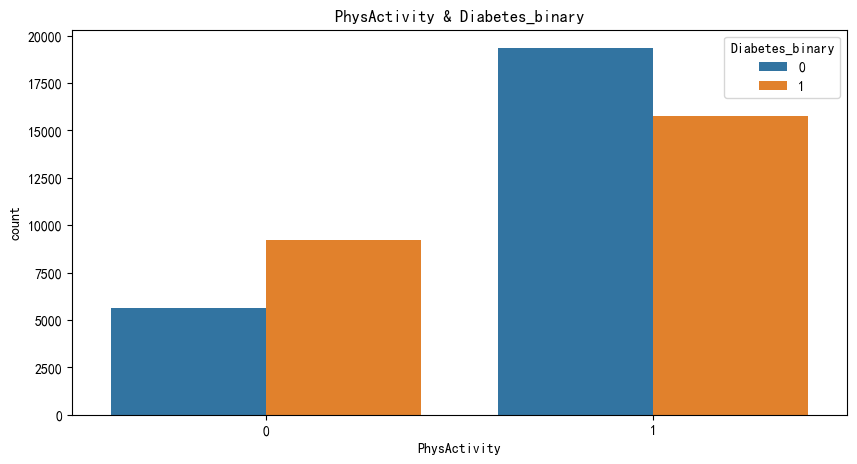

In [ ]:
print(train.groupby(['PhysActivity'])['Diabetes_binary'].agg(['count', 'mean']))
plt.figure(figsize=(10, 5))
sns.countplot(x='PhysActivity', hue='Diabetes_binary', data=train)
plt.title('PhysActivity & Diabetes_binary')

数据表明 PhysActivity 为 1 的样本数量为 35125，其中有糖尿病的样本数量占比 44.92%， PhysActivity 为 0 的样本数量 14875，其中有糖尿病的样本数量占比 61.97%。

即：**PhysActivity 对糖尿病有关**

### Fruits 对 Diabetes_binary 的分析

        count      mean
Fruits                 
0       19413  0.533405
1       30587  0.478798


Text(0.5, 1.0, 'Fruits & Diabetes_binary')

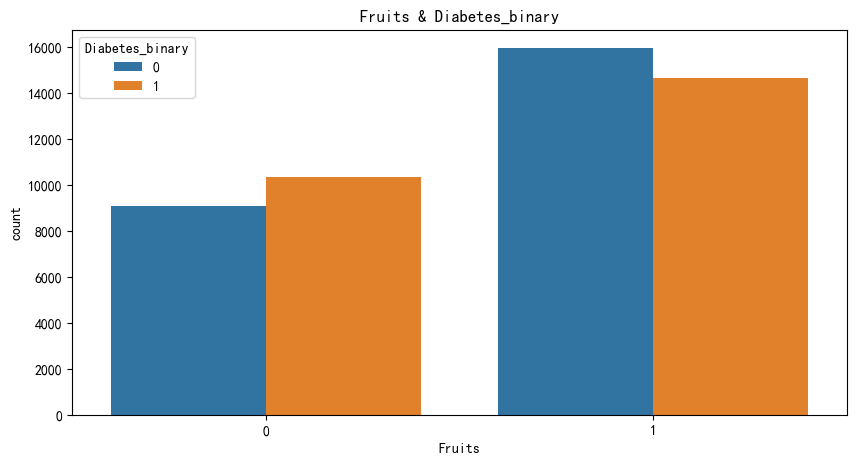

In [ ]:
print(train.groupby(['Fruits'])['Diabetes_binary'].agg(['count', 'mean']))
plt.figure(figsize=(10, 5))
sns.countplot(x='Fruits', hue='Diabetes_binary', data=train)
plt.title('Fruits & Diabetes_binary')

数据表明 Fruits 为 1 的样本数量为 30587，其中有糖尿病的样本数量占比 47.87%， Fruits 为 0 的样本数量 19413，其中有糖尿病的样本数量占比 53.34%。

即：**Fruits 对糖尿病有关**

### Veggies 对 Diabetes_binary 的分析

         count      mean
Veggies                 
0        10614  0.578010
1        39386  0.478977


Text(0.5, 1.0, 'Veggies & Diabetes_binary')

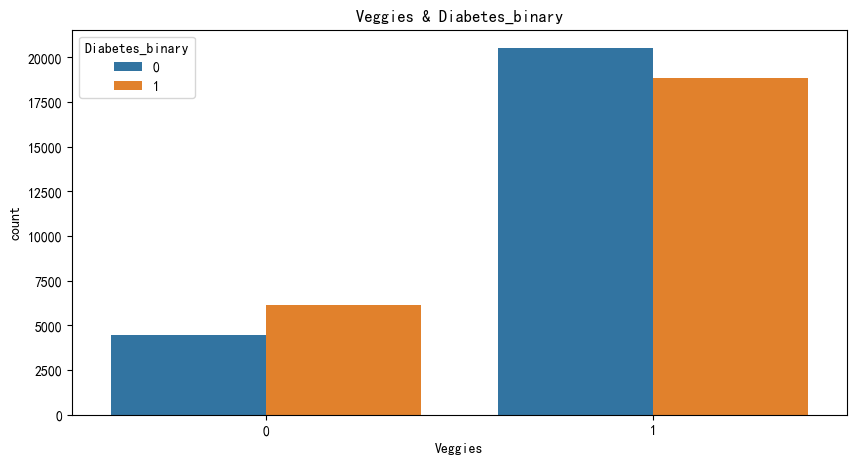

In [ ]:
print(train.groupby(['Veggies'])['Diabetes_binary'].agg(['count', 'mean']))
plt.figure(figsize=(10, 5))
sns.countplot(x='Veggies', hue='Diabetes_binary', data=train)
plt.title('Veggies & Diabetes_binary')

数据表明 Veggies 为 1 的样本数量为 39386，其中有糖尿病的样本数量占比 47.89%， Veggies 为 0 的样本数量 10614，其中有糖尿病的样本数量占比 57.80%。

即：**Veggies 对糖尿病有关**

### HvyAlcoholConsump 对 Diabetes_binary 的分析

                   count      mean
HvyAlcoholConsump                 
0                  47905  0.509780
1                   2095  0.276372


Text(0.5, 1.0, 'HvyAlcoholConsump & Diabetes_binary')

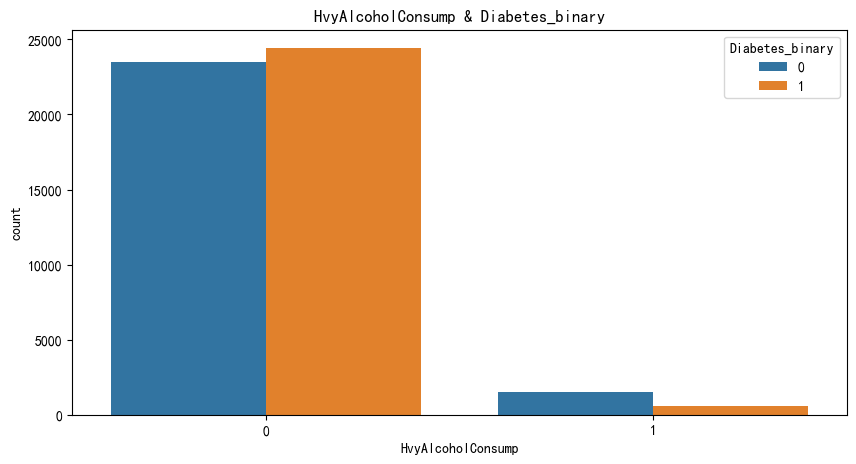

In [ ]:
print(train.groupby(['HvyAlcoholConsump'])['Diabetes_binary'].agg(['count', 'mean']))
plt.figure(figsize=(10, 5))
sns.countplot(x='HvyAlcoholConsump', hue='Diabetes_binary', data=train)
plt.title('HvyAlcoholConsump & Diabetes_binary')

数据表明 HvyAlcoholConsump 为 1 的样本数量为 2095，其中有糖尿病的样本数量占比 27.63%， HvyAlcoholConsump 为 0 的样本数量 47905，其中有糖尿病的样本数量占比 50.97%。

即：**HvyAlcoholConsump 对糖尿病有影响，但影响不大**

### AnyHealthcare 对 Diabetes_binary 的分析

               count      mean
AnyHealthcare                 
0               2282  0.444347
1              47718  0.502661


Text(0.5, 1.0, 'AnyHealthcare & Diabetes_binary')

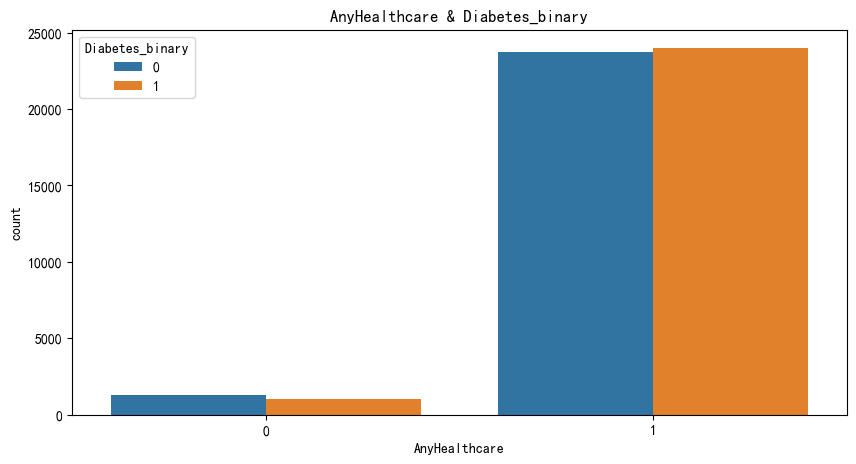

In [ ]:
print(train.groupby(['AnyHealthcare'])['Diabetes_binary'].agg(['count', 'mean']))
plt.figure(figsize=(10, 5))
sns.countplot(x='AnyHealthcare', hue='Diabetes_binary', data=train)
plt.title('AnyHealthcare & Diabetes_binary')

数据表明 AnyHealthcare 为 1 的样本数量为 47718，其中有糖尿病的样本数量占比 50.26%， AnyHealthcare 为 0 的样本数量 2282，其中有糖尿病的样本数量占比 44.43%。

即：**AnyHealthcare 对糖尿病几乎无关**

### NoDocbcCost 对 Diabetes_binary 的分析

             count      mean
NoDocbcCost                 
0            45236  0.492838
1             4764  0.568010


Text(0.5, 1.0, 'NoDocbcCost & Diabetes_binary')

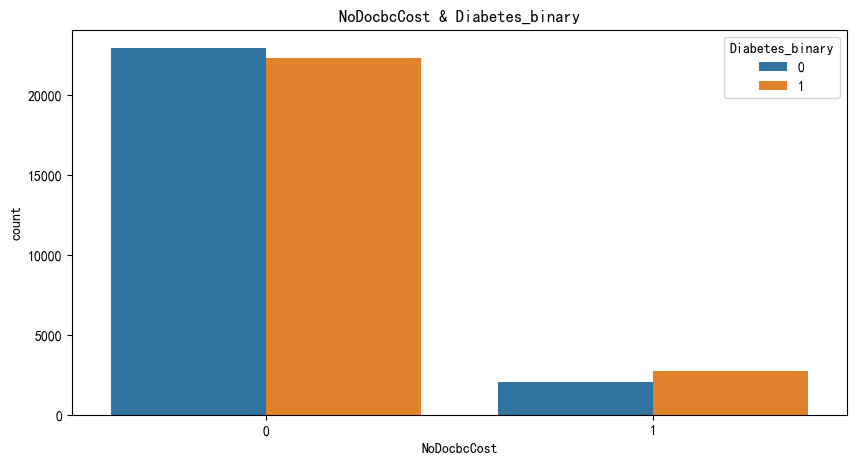

In [ ]:
print(train.groupby(['NoDocbcCost'])['Diabetes_binary'].agg(['count', 'mean']))
plt.figure(figsize=(10, 5))
sns.countplot(x='NoDocbcCost', hue='Diabetes_binary', data=train)
plt.title('NoDocbcCost & Diabetes_binary')

数据表明 NoDocbcCost 为 1 的样本数量为 4764，其中有糖尿病的样本数量占比 56.80%， NoDocbcCost 为 0 的样本数量 45236，其中有糖尿病的样本数量占比 49.28%。

即：**NoDocbcCost 对糖尿病几乎无关**

### GenHlth 对 Diabetes_binary 的分析

         count      mean
GenHlth                 
1         5896  0.137720
2        14077  0.323009
3        16576  0.577220
4         9318  0.733097
5         4133  0.784418


Text(0.5, 1.0, 'GenHlth & Diabetes_binary')

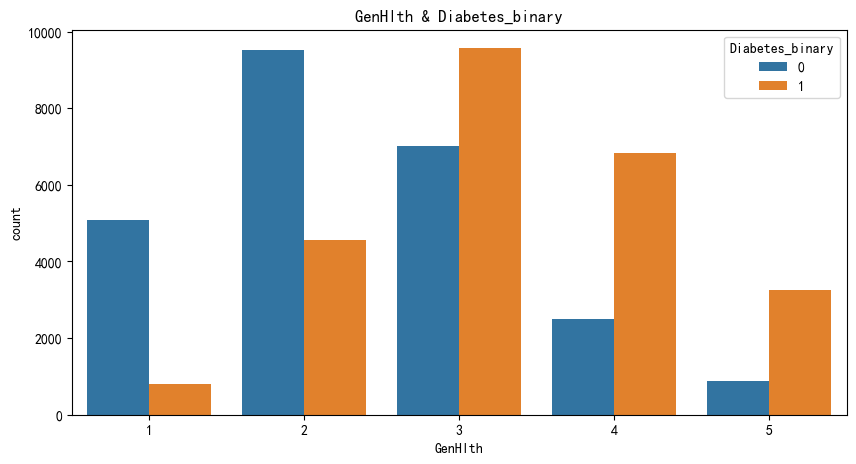

In [ ]:
print(train.groupby(['GenHlth'])['Diabetes_binary'].agg(['count', 'mean']))
plt.figure(figsize=(10, 5))
sns.countplot(x='GenHlth', hue='Diabetes_binary', data=train)
plt.title('GenHlth & Diabetes_binary')

数据表明 GenHlth 在 [3,5] 之间的糖尿病样本数量占比更大，在 [1,2] 之间的占比较小

即：**GenHlth 对糖尿病有关**

### MentHlth 对 Diabetes_binary 的分析

          count      mean
MentHlth                 
0         34014  0.486858
1          1463  0.393712
2          2325  0.468387
3          1411  0.464918
4           678  0.502950
5          1757  0.471827
6           204  0.573529
7           568  0.484155
8           142  0.507042
9            17  0.588235
10         1370  0.554745
11            6  0.500000
12           97  0.505155
13           11  0.545455
14          239  0.548117
15         1257  0.576770
16           21  0.476190
17           11  0.636364
18           34  0.470588
19            6  0.500000
20          800  0.588750
21           58  0.568966
22           15  0.533333
23           10  0.600000
24            9  0.555556
25          300  0.650000
26           15  0.400000
27           15  0.733333
28           71  0.535211
29           41  0.536585
30         3035  0.649094


Text(0.5, 1.0, 'MentHlth & Diabetes_binary')

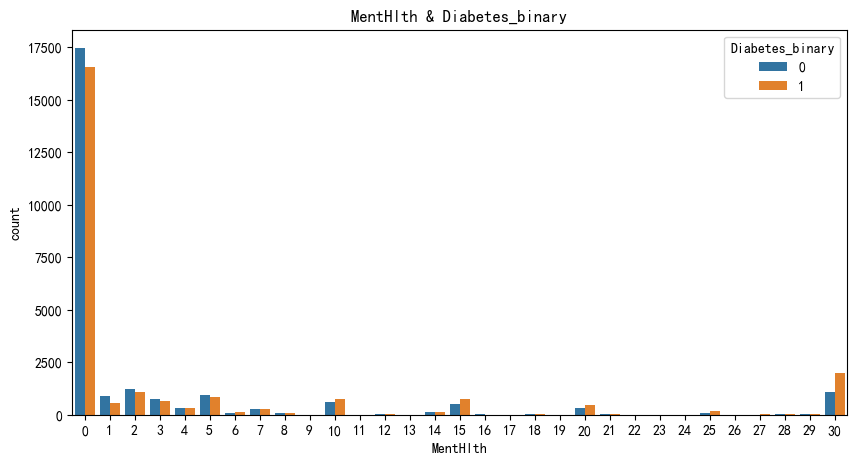

In [ ]:
print(train.groupby(['MentHlth'])['Diabetes_binary'].agg(['count', 'mean']))
plt.figure(figsize=(10, 5))
sns.countplot(x='MentHlth', hue='Diabetes_binary', data=train)
plt.title('MentHlth & Diabetes_binary')

数据表明 MentHlth 基本集中在 0 处，并且糖尿病样本数量占比均衡，但是在 30 处的占比很大

即：**MentHlth 对糖尿病有关**

### PhysHlth 对 Diabetes_binary 的分析

          count      mean
PhysHlth                 
0         28255  0.419713
1          2030  0.419704
2          2917  0.498115
3          1684  0.521971
4           971  0.544799
5          1659  0.588306
6           319  0.626959
7           925  0.561081
8           196  0.540816
9            36  0.666667
10         1393  0.653984
11           15  0.600000
12          142  0.647887
13           14  0.571429
14          579  0.588946
15         1341  0.670395
16           36  0.666667
17           28  0.750000
18           35  0.714286
19            8  0.250000
20          907  0.712238
21          161  0.571429
22           23  0.782609
23           16  0.562500
24           15  0.666667
25          397  0.700252
26           19  0.894737
27           27  0.629630
28          161  0.652174
29           76  0.815789
30         5615  0.715405


Text(0.5, 1.0, 'PhysHlth & Diabetes_binary')

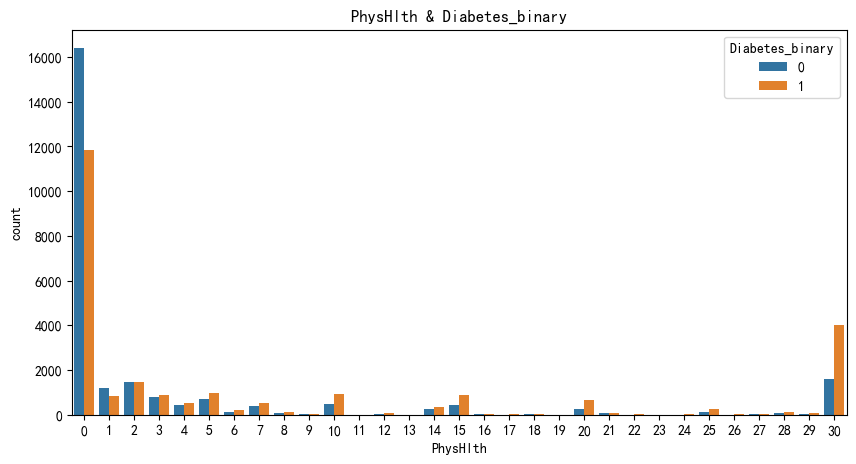

In [ ]:
print(train.groupby(['PhysHlth'])['Diabetes_binary'].agg(['count', 'mean']))
plt.figure(figsize=(10, 5))
sns.countplot(x='PhysHlth', hue='Diabetes_binary', data=train)
plt.title('PhysHlth & Diabetes_binary')

数据表明 PhysHlth 基本集中在 0 处，并且糖尿病样本数量占比均衡，但是在 30 处的占比很大

即：**PhysHlth 对糖尿病有关**

### DiffWalk 对 Diabetes_binary 的分析

          count      mean
DiffWalk                 
0         37309  0.420033
1         12691  0.735088


Text(0.5, 1.0, 'DiffWalk & Diabetes_binary')

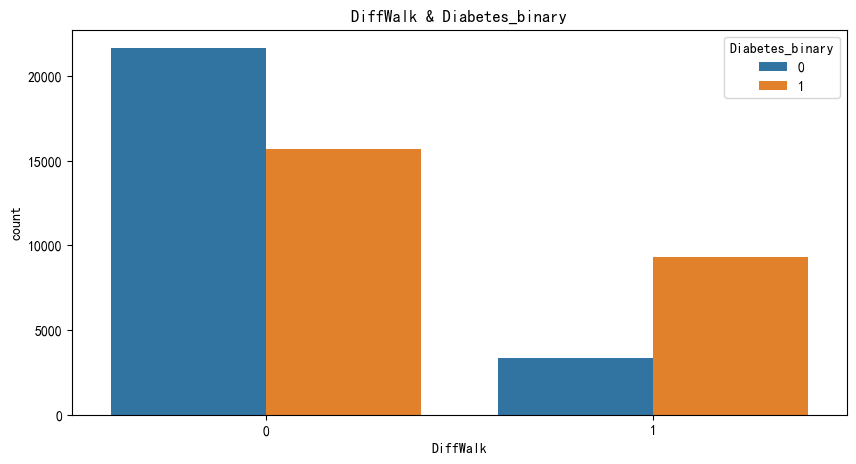

In [ ]:
print(train.groupby(['DiffWalk'])['Diabetes_binary'].agg(['count', 'mean']))
plt.figure(figsize=(10, 5))
sns.countplot(x='DiffWalk', hue='Diabetes_binary', data=train)
plt.title('DiffWalk & Diabetes_binary')

数据表明 DiffWalk 为 1 的样本数量为 12691，其中有糖尿病的样本数量占比 73.50%， DiffWalk 为 0 的样本数量 37309，其中有糖尿病的样本数量占比 42.00%。

即：**DiffWalk 对糖尿病有关**

### Sex 对 Diabetes_binary 的分析

     count      mean
Sex                 
0    27059  0.479360
1    22941  0.524345


Text(0.5, 1.0, 'Sex & Diabetes_binary')

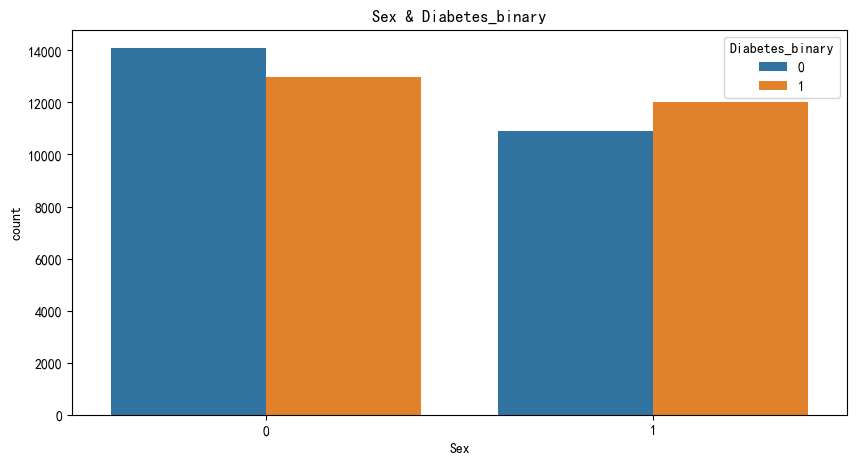

In [ ]:
print(train.groupby(['Sex'])['Diabetes_binary'].agg(['count', 'mean']))
plt.figure(figsize=(10, 5))
sns.countplot(x='Sex', hue='Diabetes_binary', data=train)
plt.title('Sex & Diabetes_binary')

数据表明 Sex 为 1 的样本数量为 22941，其中有糖尿病的样本数量占比 52.43%， Sex 为 0 的样本数量 27059，其中有糖尿病的样本数量占比 47.93%。

即：**Sex 对糖尿病基本无关**

### Age 对 Diabetes_binary 的分析

     count      mean
Age                 
1      696  0.087644
2     1015  0.099507
3     1448  0.154696
4     1985  0.216625
5     2510  0.295618
6     3307  0.367100
7     4834  0.443525
8     6089  0.496469
9     7103  0.567647
10    7662  0.606500
11    5638  0.644732
12    3825  0.637647
13    3888  0.593621


Text(0.5, 1.0, 'Age & Diabetes_binary')

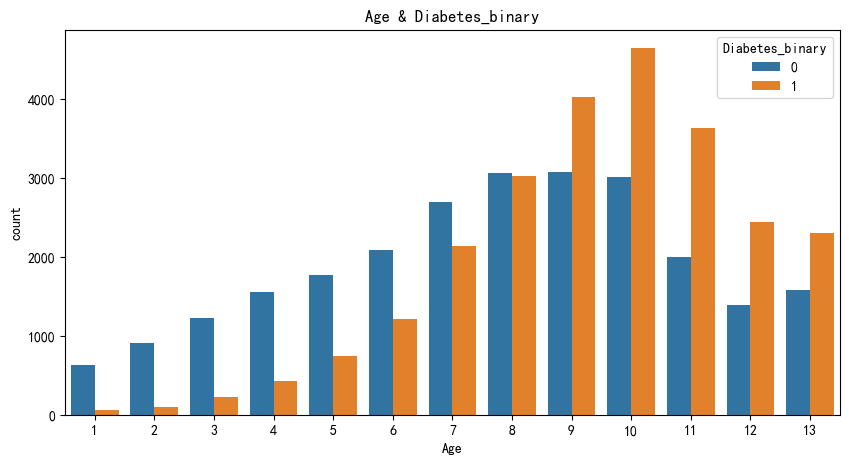

In [ ]:
print(train.groupby(['Age'])['Diabetes_binary'].agg(['count', 'mean']))
plt.figure(figsize=(10, 5))
sns.countplot(x='Age', hue='Diabetes_binary', data=train)
plt.title('Age & Diabetes_binary')

数据表明 Age 在 [8,13] 之间糖尿病样本数量占比大，其他区间占比较小

即：**Age 之间对糖尿病有关**

### Education 对 Diabetes_binary 的分析

           count      mean
Education                 
1             49  0.734694
2           1167  0.712082
3           2448  0.674837
4          13769  0.568378
5          14266  0.515491
6          18301  0.398940


Text(0.5, 1.0, 'Education & Diabetes_binary')

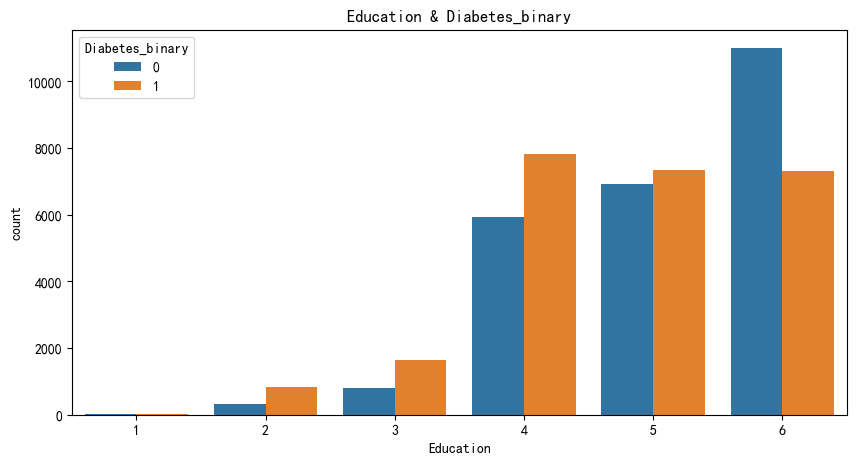

In [ ]:
print(train.groupby(['Education'])['Diabetes_binary'].agg(['count', 'mean']))
plt.figure(figsize=(10, 5))
sns.countplot(x='Education', hue='Diabetes_binary', data=train)
plt.title('Education & Diabetes_binary')

数据表明 Education 在 [1,5] 之间糖尿病样本数量占比较大，其他区间占比较小

**即：Education 对糖尿病有关**

### Income 对 Diabetes_binary 的分析

        count      mean
Income                 
1        2548  0.653061
2        3213  0.682540
3        3907  0.637830
4        4769  0.613546
5        5670  0.560847
6        7274  0.512373
7        8044  0.466310
8       14575  0.347650


Text(0.5, 1.0, 'Income & Diabetes_binary')

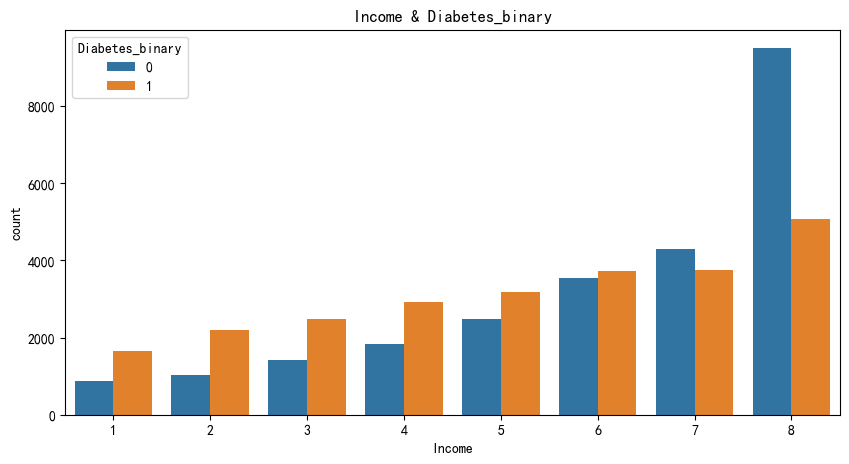

In [ ]:
print(train.groupby(['Income'])['Diabetes_binary'].agg(['count', 'mean']))
plt.figure(figsize=(10, 5))
sns.countplot(x='Income', hue='Diabetes_binary', data=train)
plt.title('Income & Diabetes_binary')

数据表明 Income 在 [1，6] 之间糖尿病样本数量占比较大，其他区间占比较小

**即：Income 对糖尿病有关**

## 相关性分析

### 特征的皮尔逊相关系数图

<Axes: title={'center': 'Pearson Correlation of Features'}>

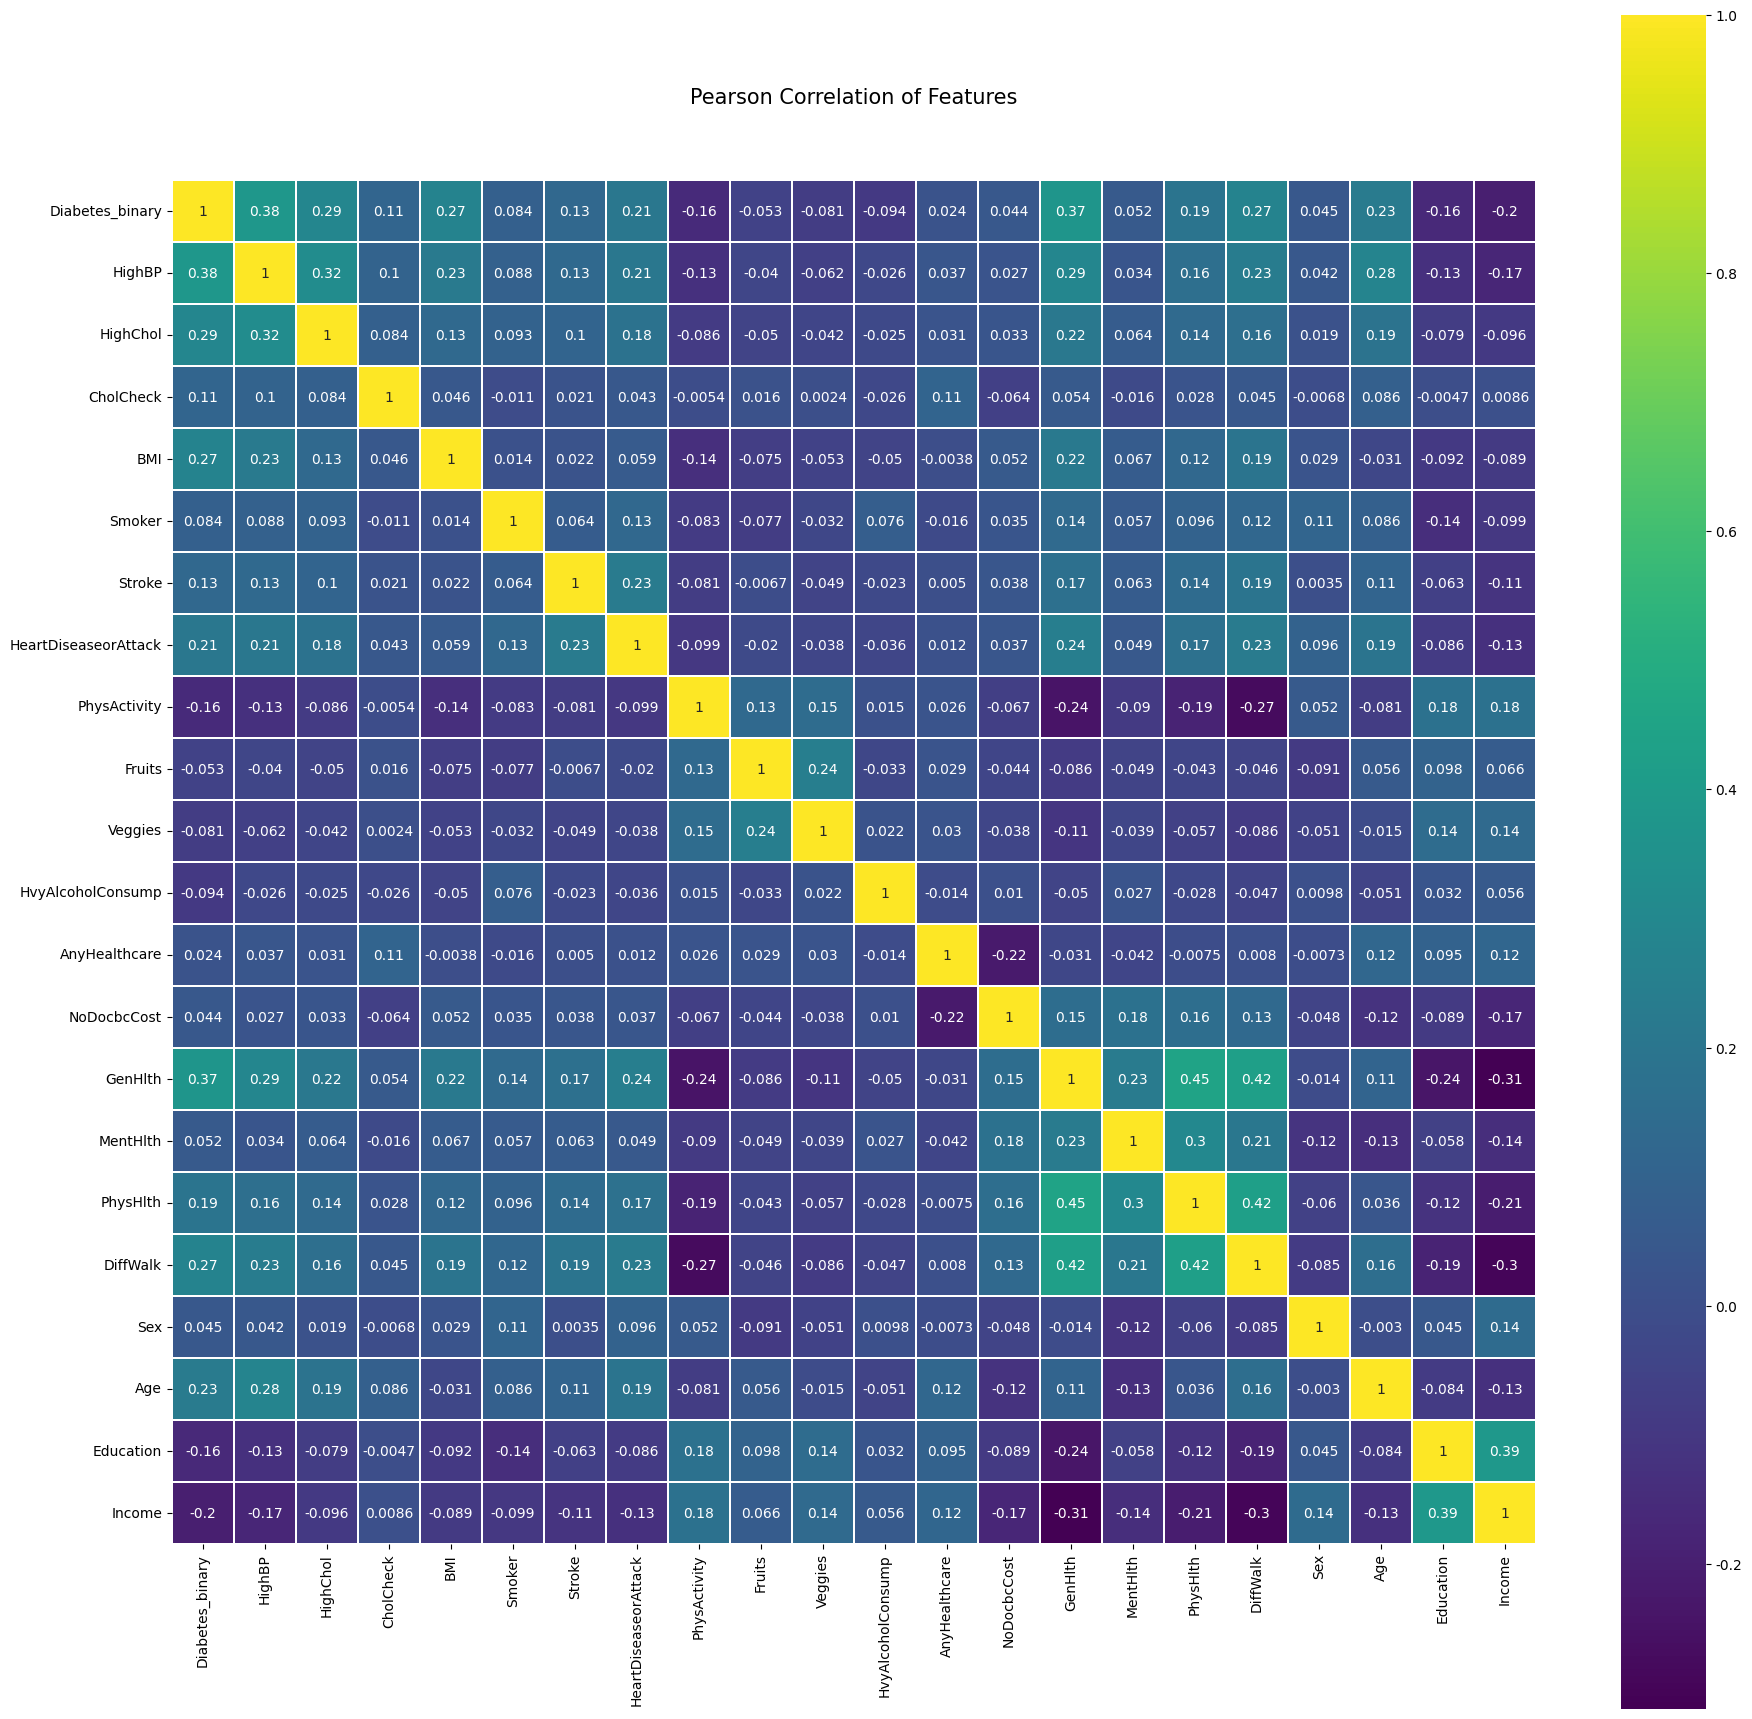

In [4]:
plt.rcParams['axes.unicode_minus']=False

train = train.drop(['ID'], axis=1)
colormap = plt.cm.viridis
plt.figure(figsize=(22, 22))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(
    train.astype(float).corr(method='kendall'),
    linewidths=0.1,
    vmax=1.0,
    square=True,
    cmap=colormap,
    linecolor='white',
    annot=True
)

## 模型比较

### 读取数据

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns


data = pd.read_csv('./dataset/train.csv')
X = data.drop(['ID', 'Diabetes_binary', 'Sex', 'NoDocbcCost', 'AnyHealthcare', 'HvyAlcoholConsump', 'Veggies', 'Fruits', 'CholCheck'], axis=1)
Y = data['Diabetes_binary']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

### KNN

In [26]:
from sklearn.neighbors import KNeighborsClassifier

training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 15)

for n_neighbors in neighbors_settings:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    training_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))

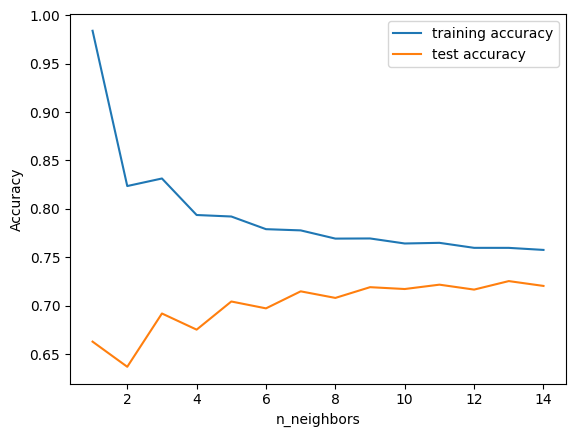

In [27]:
plt.plot(neighbors_settings, training_accuracy, label='training accuracy')
plt.plot(neighbors_settings, test_accuracy, label='test accuracy')
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')
plt.legend()
plt.savefig('knn_compare_model')

In [28]:
knn = KNeighborsClassifier(n_neighbors=14)
knn.fit(X_train, y_train)

print('Accuary on training set: {:.2f}'.format(knn.score(X_train, y_train)))
print('Accuary on test set: {:.2f}'.format(knn.score(X_test, y_test)))

Accuary on training set: 0.76
Accuary on test set: 0.72


### 逻辑回归

In [29]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000).fit(X_train, y_train)
print('Accuary on training set: {:.3f}'.format(log_reg.score(X_train, y_train)))
print('Accuary on test set: {:.3f}'.format(log_reg.score(X_test, y_test)))

Accuary on training set: 0.744
Accuary on test set: 0.749


### 决策树

In [33]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=6, random_state=0)
tree.fit(X_train, y_train)
print('Accuary on training set: {:.3f}'.format(tree.score(X_train, y_train)))
print('Accuary on test set: {:.3f}'.format(tree.score(X_test, y_test)))

Accuary on training set: 0.742
Accuary on test set: 0.744


### 随机森林

In [31]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)
print('Accuary on training set: {:.3f}'.format(rf.score(X_train, y_train)))
print('Accuary on test set: {:.3f}'.format(rf.score(X_test, y_test)))

Accuary on training set: 0.986
Accuary on test set: 0.736


### 梯度提升

In [67]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
print('Accuary on training set: {:.3f}'.format(gb.score(X_train, y_train)))
print('Accuary on test set: {:.3f}'.format(gb.score(X_test, y_test)))

Accuary on training set: 0.753
Accuary on test set: 0.759


### 支持向量机

In [37]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)
print('Accuary on training set: {:.3f}'.format(svc.score(X_train, y_train)))
print('Accuary on test set: {:.3f}'.format(svc.score(X_test, y_test)))

Accuary on training set: 0.745
Accuary on test set: 0.754


In [20]:
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svc = SVC()
svc.fit(X_train_scaled, y_train)
print('Accuary on training set: {:.3f}'.format(svc.score(X_train_scaled, y_train)))
print('Accuary on test set: {:.3f}'.format(svc.score(X_test_scaled, y_test)))

Accuary on training set: 0.747
Accuary on test set: 0.742


### 深度学习

In [74]:
from sklearn.neural_network import MLPClassifier

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)
print('Accuary on training set: {:.3f}'.format(mlp.score(X_train_scaled, y_train)))
print('Accuary on test set: {:.3f}'.format(mlp.score(X_test_scaled, y_test)))

Accuary on training set: 0.763
Accuary on test set: 0.766


In [76]:
scores = []
scores.append(knn.score(X_test, y_test))
scores.append(log_reg.score(X_test, y_test))
scores.append(tree.score(X_test, y_test))
scores.append(rf.score(X_test, y_test))
scores.append(gb.score(X_test, y_test))
scores.append(svc.score(X_test, y_test))
scores.append(mlp.score(X_test_scaled, y_test))

#汇总数据
cvResDf=pd.DataFrame({'score': scores,
                     'algorithm':['knn','log_reg','tree',
                                  'rf','gb','svc','mlp']})

cvResDf

,score,algorithm
0,0.7203,knn
1,0.7485,log_reg
2,0.7438,tree
3,0.7363,rf
4,0.7588,gb
5,0.7542,svc
6,0.7661,mlp


/Users/fengzetao/miniconda3/envs/req/lib/python3.9/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/fengzetao/miniconda3/envs/req/lib/python3.9/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)


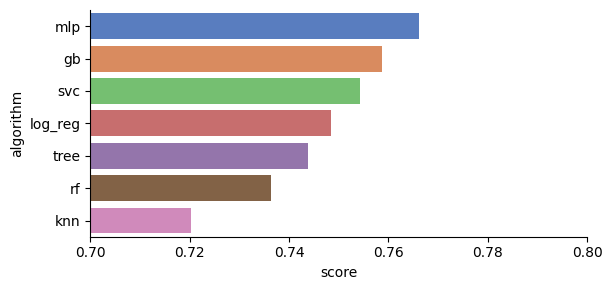

In [77]:
cvResFacet=sns.FacetGrid(cvResDf.sort_values(by='score',ascending=False),sharex=False,
            sharey=False,aspect=2)
cvResFacet.map(sns.barplot,'score','algorithm',
               palette='muted')
cvResFacet.set(xlim=(0.7,0.8))
cvResFacet.add_legend()